### Import necessary libraries

In [356]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import math as mt 
import matplotlib.pyplot as plt
import warnings 
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline 
pd.set_option('display.max_columns',None)
warnings.simplefilter(action='ignore')

In [357]:
df = pd.read_csv('zillow_initial_dataset.csv')
df_copy = df.copy()
df.shape

(90275, 60)

In [358]:
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,17073783,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,548.0,1264.0,1264.0,NaN,NaN,548.0,NaN,6111.0,NaN,2.0,2.0,0.0,NaN,NaN,34303597.0,-119287236.0,1735.0,NaN,NaN,NaN,NaN,NaN,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97081.0,5.0,NaN,1.0,NaN,NaN,128.0,NaN,1986.0,2.0,NaN,115087.0,191811.0,2015.0,76724.0,2015.06,NaN,NaN,6.111002e+13,0.0953,2016-01-27
1,17088994,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,777.0,777.0,777.0,NaN,NaN,777.0,NaN,6111.0,NaN,1.0,1.0,0.0,NaN,NaN,34272866.0,-119198911.0,NaN,NaN,NaN,NaN,NaN,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,NaN,97083.0,4.0,NaN,NaN,NaN,NaN,198.0,NaN,1990.0,1.0,NaN,143809.0,239679.0,2015.0,95870.0,2581.30,NaN,NaN,6.111002e+13,0.0198,2016-03-30
2,17100444,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,1101.0,1101.0,1101.0,NaN,NaN,1101.0,NaN,6111.0,NaN,2.0,2.0,441.0,NaN,NaN,34340801.0,-119079610.0,6569.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1956.0,1.0,NaN,33619.0,47853.0,2015.0,14234.0,591.64,NaN,NaN,6.111001e+13,0.0060,2016-05-27
3,17102429,NaN,NaN,NaN,1.5,2.0,NaN,NaN,1.5,NaN,1554.0,1554.0,1554.0,NaN,NaN,1554.0,NaN,6111.0,1.0,1.0,2.0,460.0,NaN,NaN,34354313.0,-119076405.0,7400.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,NaN,97113.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,1965.0,1.0,NaN,45609.0,62914.0,2015.0,17305.0,682.78,NaN,NaN,6.111001e+13,-0.0566,2016-06-07
4,17109604,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,1305.0,2415.0,2415.0,NaN,NaN,1305.0,NaN,6111.0,1.0,2.0,2.0,665.0,NaN,NaN,34266578.0,-119165392.0,6326.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,NaN,97084.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1984.0,2.0,NaN,277000.0,554000.0,2015.0,277000.0,5886.92,NaN,NaN,6.111001e+13,0.0573,2016-08-08


### Duplicate entry check and removal

In [359]:
duplicate = df[df.duplicated('parcelid')]
duplicate.shape

(125, 60)

We observe that there are 125 rows of duplicate data.We have to drop those values

In [360]:
df.drop_duplicates(subset="parcelid",keep='first',inplace=True)
df.shape

(90150, 60)

### Missing Values

In [361]:
mis_val = [var for var in df.columns if df[var].isnull().sum() > 0]
df[mis_val].isnull().sum()

airconditioningtypeid           61402
architecturalstyletypeid        89890
basementsqft                    90107
buildingclasstypeid             90134
buildingqualitytypeid           32866
calculatedbathnbr                1176
decktypeid                      89492
finishedfloor1squarefeet        83300
calculatedfinishedsquarefeet      658
finishedsquarefeet12             4665
finishedsquarefeet13            90117
finishedsquarefeet15            86595
finishedsquarefeet50            83300
finishedsquarefeet6             89731
fireplacecnt                    80553
fullbathcnt                      1176
garagecarcnt                    60253
garagetotalsqft                 60253
hashottuborspa                  87787
heatingorsystemtypeid           34145
lotsizesquarefeet               10136
poolcnt                         72274
poolsizesum                     89184
pooltypeid10                    88991
pooltypeid2                     88946
pooltypeid7                     73478
propertycoun

### Dropping columns having>60% missing values


In [362]:
def drop_columns_with_max_missing_values(df):

    mis_var = [var for var in df.columns if df[var].isnull().sum() >0]
    df[mis_var].isnull().sum()
    
    limit = np.abs((df.shape[0] * 0.6))
    var_to_be_dropped = [var for var in mis_var if df[var].isnull().sum() > limit]
    print('Columns with more than 60% missing vales: \n\n', var_to_be_dropped)

    df.drop(columns=var_to_be_dropped, axis=1,inplace=True)
    print('Remaining columns: \n', df.columns)
    return df

df=drop_columns_with_max_missing_values(df)
df.shape

Columns with more than 60% missing vales: 

 ['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'regionidneighborhood', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories', 'fireplaceflag', 'taxdelinquencyflag', 'taxdelinquencyyear']
Remaining columns: 
 Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdes

(90150, 31)

### Capture elapsed time

In [363]:
df['yeardifference']  = df['assessmentyear']  - df['yearbuilt']
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,yeardifference
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,NaN,34303597.0,-119287236.0,1735.0,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,97081.0,5.0,NaN,1986.0,115087.0,191811.0,2015.0,76724.0,2015.06,6.111002e+13,0.0953,2016-01-27,29.0
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,NaN,34272866.0,-119198911.0,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,97083.0,4.0,NaN,1990.0,143809.0,239679.0,2015.0,95870.0,2581.30,6.111002e+13,0.0198,2016-03-30,25.0
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,NaN,34340801.0,-119079610.0,6569.0,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,97113.0,5.0,NaN,1956.0,33619.0,47853.0,2015.0,14234.0,591.64,6.111001e+13,0.0060,2016-05-27,59.0
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,NaN,34354313.0,-119076405.0,7400.0,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,97113.0,5.0,NaN,1965.0,45609.0,62914.0,2015.0,17305.0,682.78,6.111001e+13,-0.0566,2016-06-07,50.0
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,NaN,34266578.0,-119165392.0,6326.0,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,97084.0,8.0,NaN,1984.0,277000.0,554000.0,2015.0,277000.0,5886.92,6.111001e+13,0.0573,2016-08-08,31.0


In [364]:
# we will be dropping all the time related columns

df.drop(columns=['assessmentyear','yearbuilt','transactiondate'],axis=1,inplace= True)

### Transform incorrectly scaled variables


In [365]:
df.head(5)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,NaN,34303597.0,-119287236.0,1735.0,1128,265.0,NaN,6.111002e+07,34543.0,2061.0,97081.0,5.0,NaN,115087.0,191811.0,76724.0,2015.06,6.111002e+13,0.0953,29.0
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,NaN,34272866.0,-119198911.0,NaN,1129,266.0,NaN,6.111002e+07,34543.0,2061.0,97083.0,4.0,NaN,143809.0,239679.0,95870.0,2581.30,6.111002e+13,0.0198,25.0
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,NaN,34340801.0,-119079610.0,6569.0,1111,261.0,NaN,6.111001e+07,26965.0,2061.0,97113.0,5.0,NaN,33619.0,47853.0,14234.0,591.64,6.111001e+13,0.0060,59.0
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,NaN,34354313.0,-119076405.0,7400.0,1110,261.0,NaN,6.111001e+07,26965.0,2061.0,97113.0,5.0,NaN,45609.0,62914.0,17305.0,682.78,6.111001e+13,-0.0566,50.0
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,NaN,34266578.0,-119165392.0,6326.0,1111,261.0,NaN,6.111001e+07,34543.0,2061.0,97084.0,8.0,NaN,277000.0,554000.0,277000.0,5886.92,6.111001e+13,0.0573,31.0


In [366]:
df[['latitude','longitude']] =(df[['latitude','longitude']])/(10**6)
df['censustractandblock'] = (df['censustractandblock'])/(10**12)
df['rawcensustractandblock'] = (df['rawcensustractandblock'])/(10**6)
df.head(10)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference
0,17073783,2.5,3.0,NaN,2.5,1264.0,1264.0,6111.0,2.0,NaN,34.303597,-119.287236,1735.0,1128,265.0,NaN,61.110022,34543.0,2061.0,97081.0,5.0,NaN,115087.0,191811.0,76724.0,2015.06,61.110022,0.0953,29.0
1,17088994,1.0,2.0,NaN,1.0,777.0,777.0,6111.0,1.0,NaN,34.272866,-119.198911,NaN,1129,266.0,NaN,61.110015,34543.0,2061.0,97083.0,4.0,NaN,143809.0,239679.0,95870.0,2581.30,61.110015,0.0198,25.0
2,17100444,2.0,3.0,NaN,2.0,1101.0,1101.0,6111.0,2.0,NaN,34.340801,-119.079610,6569.0,1111,261.0,NaN,61.110007,26965.0,2061.0,97113.0,5.0,NaN,33619.0,47853.0,14234.0,591.64,61.110007,0.0060,59.0
3,17102429,1.5,2.0,NaN,1.5,1554.0,1554.0,6111.0,1.0,NaN,34.354313,-119.076405,7400.0,1110,261.0,NaN,61.110008,26965.0,2061.0,97113.0,5.0,NaN,45609.0,62914.0,17305.0,682.78,61.110008,-0.0566,50.0
4,17109604,2.5,4.0,NaN,2.5,2415.0,2415.0,6111.0,2.0,NaN,34.266578,-119.165392,6326.0,1111,261.0,NaN,61.110014,34543.0,2061.0,97084.0,8.0,NaN,277000.0,554000.0,277000.0,5886.92,61.110014,0.0573,31.0
5,17125829,2.5,4.0,NaN,2.5,2882.0,2882.0,6111.0,2.0,NaN,34.240014,-119.024793,10000.0,1111,261.0,NaN,61.110052,51239.0,2061.0,97089.0,8.0,NaN,222070.0,289609.0,67539.0,3110.44,61.110052,0.0564,35.0
6,17132911,2.0,3.0,NaN,2.0,1772.0,1772.0,6111.0,2.0,NaN,34.226842,-119.059815,8059.0,1111,261.0,NaN,61.110055,51239.0,2061.0,97089.0,6.0,NaN,185000.0,526000.0,341000.0,5632.20,61.110055,0.0315,37.0
7,17134926,2.5,5.0,NaN,2.5,2632.0,2632.0,6111.0,2.0,NaN,34.229816,-119.050224,7602.0,1111,261.0,NaN,61.110055,51239.0,2061.0,97089.0,8.0,NaN,342611.0,571086.0,228475.0,6109.94,61.110055,0.0257,44.0
8,17139988,2.0,3.0,NaN,2.0,1292.0,1292.0,6111.0,2.0,NaN,34.226351,-118.983853,7405.0,1111,261.0,NaN,61.110053,51239.0,2061.0,97091.0,6.0,NaN,231297.0,462594.0,231297.0,5026.40,61.110053,0.0020,36.0
9,17167359,1.0,3.0,NaN,1.0,1385.0,1385.0,6111.0,1.0,NaN,34.179289,-119.169287,6000.0,1111,261.0,NaN,61.110039,13150.0,2061.0,97104.0,6.0,NaN,134251.0,268502.0,134251.0,3217.06,61.110039,-0.0576,65.0


### Handling Missing Values

In [367]:
#Replace the missing values in the orginal variable with the mode
df.isnull().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           32866
calculatedbathnbr                1176
calculatedfinishedsquarefeet      658
finishedsquarefeet12             4665
fips                                0
fullbathcnt                      1176
heatingorsystemtypeid           34145
latitude                            0
longitude                           0
lotsizesquarefeet               10136
propertycountylandusecode           1
propertylandusetypeid               0
propertyzoningdesc              31918
rawcensustractandblock              0
regionidcity                     1801
regionidcounty                      0
regionidzip                        35
roomcnt                             0
unitcnt                         31879
structuretaxvaluedollarcnt        378
taxvaluedollarcnt                   1
landtaxvaluedollarcnt               1
taxamount                           6
censustracta

In [368]:
def replace_missing_data(df,mis_vars):

    for var in mis_vars:
        df[var] = df[var].fillna(df[var].mode()[0])

    return df

mis_var = [var for var in df.columns if df[var].isnull().sum() > 0]
df = replace_missing_data(df,mis_var)

In [369]:
df.isnull().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
propertylandusetypeid           0
propertyzoningdesc              0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
yeardifference                  0
dtype: int64

### Encoding Categorical Variables

In [370]:
catg_vars = [var for var in df.columns if df[var].dtypes == 'O']
catg_vars

['propertycountylandusecode', 'propertyzoningdesc']

In [371]:
def encode_categorical_variables(df, catg_vars):
    
    for i in range(len(catg_vars)):
 
        var = catg_vars[i]
        var_le = LabelEncoder()
        var_labels  = var_le.fit_transform(df[var])
        var_mappings = {index: label for index, label in enumerate(var_le.classes_)}
        df[(var + '_labels')] = var_labels
        df.drop(columns=var ,axis=1 ,inplace = True)

    return df

        

df = encode_categorical_variables(df, catg_vars)
df.head(8)

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference,propertycountylandusecode_labels,propertyzoningdesc_labels
0,17073783,2.5,3.0,7.0,2.5,1264.0,1264.0,6111.0,2.0,2.0,34.303597,-119.287236,1735.0,265.0,61.110022,34543.0,2061.0,97081.0,5.0,1.0,115087.0,191811.0,76724.0,2015.06,61.110022,0.0953,29.0,54,609
1,17088994,1.0,2.0,7.0,1.0,777.0,777.0,6111.0,1.0,2.0,34.272866,-119.198911,6000.0,266.0,61.110015,34543.0,2061.0,97083.0,4.0,1.0,143809.0,239679.0,95870.0,2581.30,61.110015,0.0198,25.0,55,609
2,17100444,2.0,3.0,7.0,2.0,1101.0,1101.0,6111.0,2.0,2.0,34.340801,-119.079610,6569.0,261.0,61.110007,26965.0,2061.0,97113.0,5.0,1.0,33619.0,47853.0,14234.0,591.64,61.110007,0.0060,59.0,50,609
3,17102429,1.5,2.0,7.0,1.5,1554.0,1554.0,6111.0,1.0,2.0,34.354313,-119.076405,7400.0,261.0,61.110008,26965.0,2061.0,97113.0,5.0,1.0,45609.0,62914.0,17305.0,682.78,61.110008,-0.0566,50.0,49,609
4,17109604,2.5,4.0,7.0,2.5,2415.0,2415.0,6111.0,2.0,2.0,34.266578,-119.165392,6326.0,261.0,61.110014,34543.0,2061.0,97084.0,8.0,1.0,277000.0,554000.0,277000.0,5886.92,61.110014,0.0573,31.0,50,609
5,17125829,2.5,4.0,7.0,2.5,2882.0,2882.0,6111.0,2.0,2.0,34.240014,-119.024793,10000.0,261.0,61.110052,51239.0,2061.0,97089.0,8.0,1.0,222070.0,289609.0,67539.0,3110.44,61.110052,0.0564,35.0,50,609
6,17132911,2.0,3.0,7.0,2.0,1772.0,1772.0,6111.0,2.0,2.0,34.226842,-119.059815,8059.0,261.0,61.110055,51239.0,2061.0,97089.0,6.0,1.0,185000.0,526000.0,341000.0,5632.20,61.110055,0.0315,37.0,50,609
7,17134926,2.5,5.0,7.0,2.5,2632.0,2632.0,6111.0,2.0,2.0,34.229816,-119.050224,7602.0,261.0,61.110055,51239.0,2061.0,97089.0,8.0,1.0,342611.0,571086.0,228475.0,6109.94,61.110055,0.0257,44.0,50,609


### Checking & Removing Outliers

In [372]:
df.shape

(90150, 29)

In [373]:
z = np.abs(stats.zscore(df))
no_out_df = df[(z<3).all(axis=1)]
no_out_df.shape

(70260, 29)

### Checking for Multi-Colinearity

In [374]:
no_out_df.corr()
#This is bit difficult to understand

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,yeardifference,propertycountylandusecode_labels,propertyzoningdesc_labels
parcelid,1.000000,0.028423,0.014068,0.427057,0.032116,0.046356,0.050844,0.875261,-0.071773,-0.197104,-0.799259,0.870357,-0.206629,0.045825,0.875924,0.172686,-0.875261,0.515522,0.515036,-0.032935,0.020601,0.108378,0.131451,0.036577,0.870684,0.025329,-0.222907,0.852989,-0.212511
bathroomcnt,0.028423,1.000000,0.576233,-0.302725,0.977620,0.723948,0.717572,0.096319,0.954987,-0.421220,0.025654,0.033585,0.022510,0.016769,0.097628,-0.024891,-0.096319,0.160784,0.040256,0.071092,0.585840,0.409102,0.239859,0.387460,0.099102,0.045766,-0.455964,0.093602,0.018170
bedroomcnt,0.014068,0.576233,1.000000,-0.093848,0.536776,0.658793,0.646947,0.062177,0.528829,-0.146429,0.067254,0.055389,-0.182343,-0.383565,0.064273,-0.016572,-0.062177,0.154325,0.198038,0.091626,0.306879,0.228897,0.142587,0.230341,0.067906,0.035055,-0.075797,0.006568,0.042841
buildingqualitytypeid,0.427057,-0.302725,-0.093848,1.000000,-0.299723,-0.205977,-0.213388,0.421916,-0.352713,0.276822,-0.401890,0.365455,-0.232023,-0.205658,0.420252,0.048790,-0.421916,0.194921,0.275909,0.049354,-0.190432,-0.055208,0.024085,-0.082563,0.417279,-0.007708,0.230517,0.387709,-0.191120
calculatedbathnbr,0.032116,0.977620,0.536776,-0.299723,1.000000,0.734344,0.725233,0.102517,0.978121,-0.441510,0.027565,0.037354,0.019215,0.020252,0.103956,-0.025117,-0.102517,0.171171,0.033440,0.085811,0.602654,0.416746,0.245013,0.401416,0.103023,0.043166,-0.458126,0.102588,0.016810
calculatedfinishedsquarefeet,0.046356,0.723948,0.658793,-0.205977,0.734344,1.000000,0.987221,0.123846,0.709037,-0.303495,0.009003,0.064941,-0.120061,-0.260786,0.125167,-0.045079,-0.123846,0.182274,0.123370,0.084267,0.670533,0.507249,0.329372,0.502419,0.125288,0.050139,-0.250244,0.076094,-0.000506
finishedsquarefeet12,0.050844,0.717572,0.646947,-0.213388,0.725233,0.987221,1.000000,0.130418,0.698733,-0.299525,0.008483,0.069499,-0.117778,-0.199295,0.131834,-0.043502,-0.130418,0.192094,0.128849,-0.051075,0.672593,0.507636,0.328845,0.501731,0.131922,0.050546,-0.265281,0.070824,0.000853
fips,0.875261,0.096319,0.062177,0.421916,0.102517,0.123846,0.130418,1.000000,-0.011524,-0.294910,-0.683274,0.705664,-0.201421,0.019266,0.999777,0.053290,-1.000000,0.667727,0.653662,-0.043558,0.064417,0.146449,0.159506,0.074968,0.994001,0.019448,-0.289936,0.971803,-0.316782
fullbathcnt,-0.071773,0.954987,0.528829,-0.352713,0.978121,0.709037,0.698733,-0.011524,1.000000,-0.413791,0.110533,-0.049075,0.043562,0.009436,-0.010022,-0.036352,0.011524,0.095528,-0.014656,0.093458,0.574096,0.385969,0.218985,0.379323,-0.010311,0.040571,-0.405678,-0.006417,0.053636
heatingorsystemtypeid,-0.197104,-0.421220,-0.146429,0.276822,-0.441510,-0.303495,-0.299525,-0.294910,-0.413791,1.000000,0.045993,-0.167438,-0.118462,-0.202664,-0.296795,0.016368,0.294910,-0.330675,-0.167427,-0.042316,-0.291480,-0.175315,-0.084778,-0.140855,-0.295272,-0.013840,0.518832,-0.326597,0.023738


<Axes: >

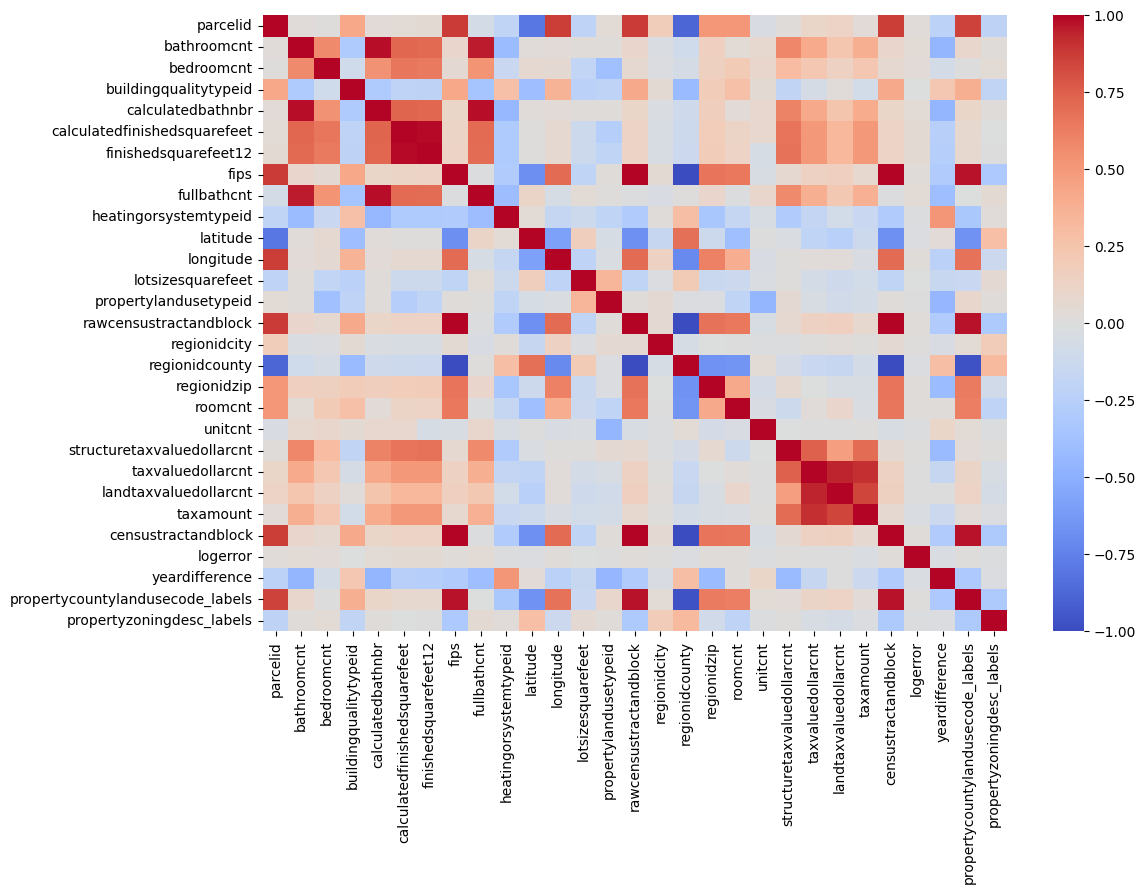

In [375]:
plt.figure(figsize=(12,8))
sns.heatmap(no_out_df.corr(),cmap='coolwarm')

we observe high correlation between some of the feature variables from the above correlation plot

<Axes: >

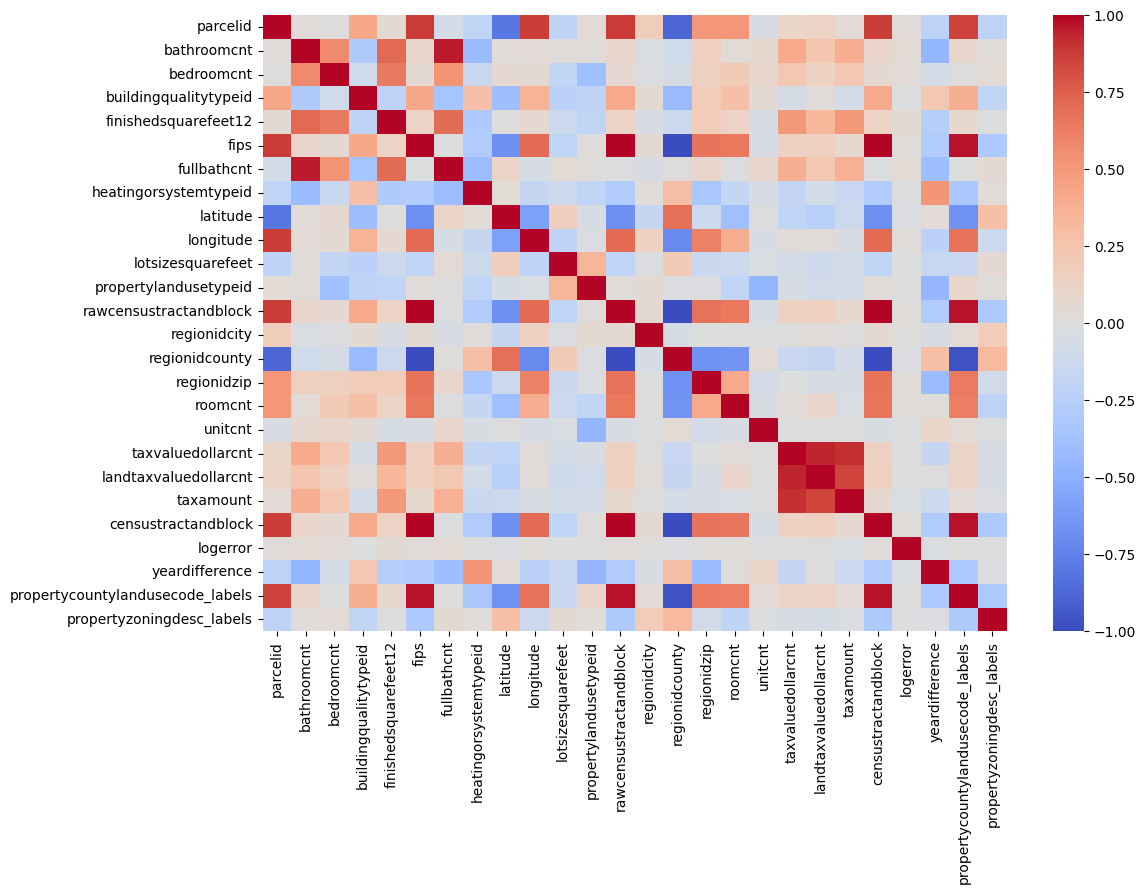

In [376]:
no_out_df.drop(columns=['calculatedbathnbr','calculatedfinishedsquarefeet','structuretaxvaluedollarcnt'], axis=1 ,inplace= True)
plt.figure(figsize=(12,8))
sns.heatmap(no_out_df.corr(),cmap='coolwarm')

<Axes: >

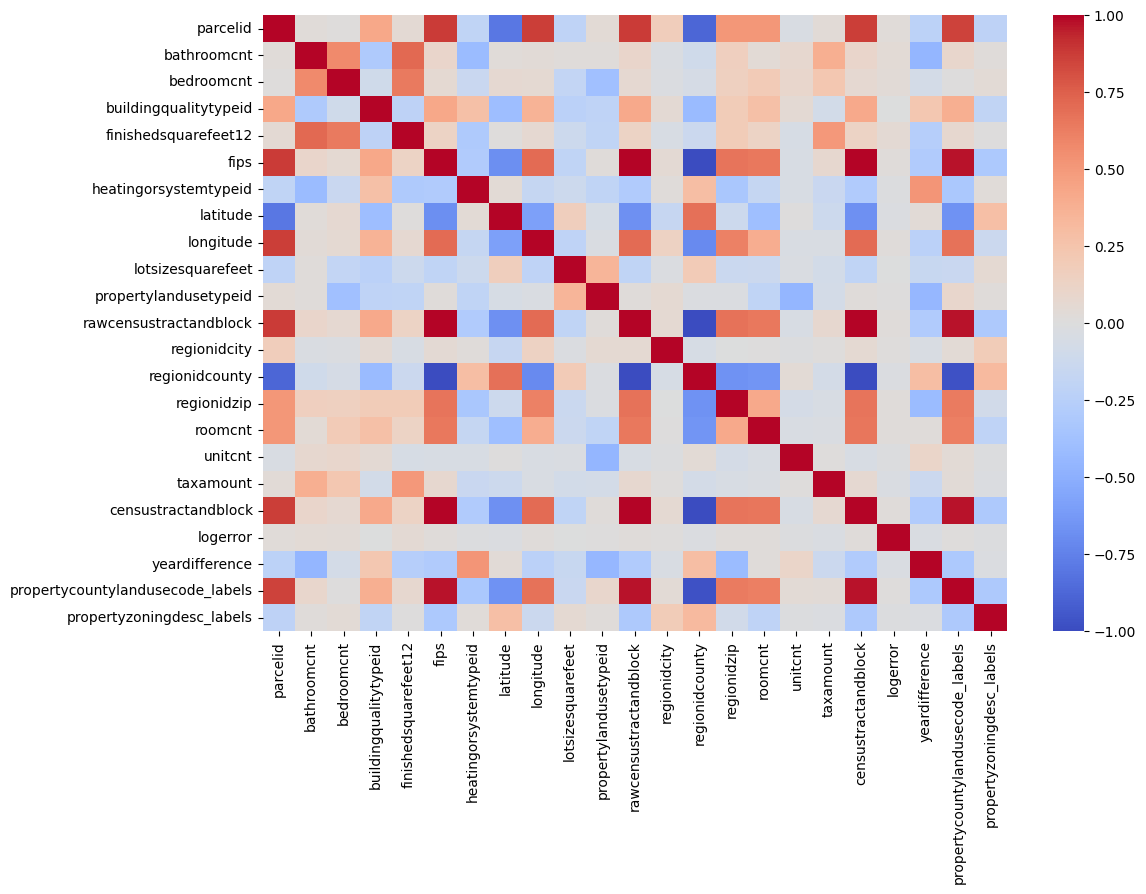

In [377]:
no_out_df.drop(columns=['taxvaluedollarcnt','landtaxvaluedollarcnt','fullbathcnt'], axis=1 ,inplace= True)
plt.figure(figsize=(12,8))
sns.heatmap(no_out_df.corr(),cmap='coolwarm')

### Re-Examining Dataset

In [378]:
no_out_df.shape

(70260, 23)

In [379]:
no_out_df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,finishedsquarefeet12,fips,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,taxamount,censustractandblock,logerror,yeardifference,propertycountylandusecode_labels,propertyzoningdesc_labels
26,10726315,3.0,3.0,4.0,2445.0,6037.0,2.0,34.184300,-118.657000,63878.0,266.0,60.371352,12447.0,3101.0,96389.0,0.0,1.0,7170.22,60.371352,0.0383,33.0,9,627
27,10727091,2.0,3.0,7.0,1160.0,6037.0,2.0,34.188121,-118.646361,7688.0,261.0,60.371352,12447.0,3101.0,96342.0,0.0,1.0,5421.96,60.371352,0.0030,55.0,2,638
28,10730788,2.0,4.0,7.0,1570.0,6037.0,2.0,34.188446,-118.616724,11308.0,261.0,60.371351,12447.0,3101.0,96342.0,0.0,1.0,5097.78,60.371351,-0.0020,56.0,2,638
29,10735394,3.0,4.0,4.0,2863.0,6037.0,2.0,34.171439,-118.646883,16376.0,261.0,60.371373,12447.0,3101.0,96389.0,0.0,1.0,7475.21,60.371373,0.0129,52.0,3,632
31,10743512,3.0,2.0,4.0,1394.0,6037.0,2.0,34.152890,-118.791494,77543.0,269.0,60.378003,34278.0,3101.0,96385.0,0.0,1.0,5550.36,60.378003,0.0630,17.0,10,769


We have drop few columns again
1.The data in wawcensustractandblock and censustractandbook is same.
2.The propertycountylandusecode_labels will serve no usefil purpose for our model prediction
3.Parcelid field will also server no use for prediction

In [380]:
no_out_df.drop(columns=['censustractandblock','propertycountylandusecode_labels'],axis=1,inplace=True)
no_out_df.shape

(70260, 21)

### Saving Dataset

In [381]:
no_out_df.to_csv('final_zillow_dataset.csv',index=False)